<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%EA%B0%95%EC%84%A4%EB%9F%89_data%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###삼성화재X포스텍 데이터기반 리스크관리 경진대회

-  자동차보험: 강설량에 따른 사고율 예측 모델
- 주요 지역별 강설량에 따른 사고율 예측 정확성 제고 필요
- 인공지능 모형을 활용한 지역별 강설 데이터 기반 사고율 추정 모델 구축


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# os 관리를 위한 라이브러리
import os
import gc
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

#한글 깨짐 현상을 방지하기 위한 글꼴 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,581 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**0.데이터 불러오기**
- 삼성화재 사고량 데이터

In [40]:
data1=pd.read_excel('/content/drive/MyDrive/최근/강설량data/(자동차보험) 강설량에 따른 사고율 예측 모델_1.xlsx')
data2=pd.read_excel('/content/drive/MyDrive/최근/강설량data/(자동차보험) 강설량에 따른 사고율 예측 모델_2.xlsx')
data3=pd.read_excel('/content/drive/MyDrive/최근/강설량data/(자동차보험) 강설량에 따른 사고율 예측 모델_3.xlsx')

In [41]:
data_total=pd.concat([data1,data2,data3])

In [42]:
print(data_total.head())
print(data_total.tail())

     사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
0  20170101    2017       1     전남    무안군     Y    Y   7   1    22
1  20170101    2017       1     전남    장성군     Y    Y   7   1     3
2  20170101    2017       1     인천     중구     Y    Y   7   1    19
3  20170101    2017       1     경북    경주시     Y    Y   7   1    35
4  20170101    2017       1     경남    통영시     Y    Y   7   1    14
          사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
121005  20230630    2023       6     인천     동구     N    N   5   5     6
121006  20230630    2023       6     부산     남구     N    N   5   5     8
121007  20230630    2023       6     대구     동구     N    N   5   5    13
121008  20230630    2023       6     전남    담양군     N    N   5   5     5
121009  20230630    2023       6     충남    서천군     N    N   5   5     3


In [43]:
data_total['사고발생일자'] = data_total['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [67]:
print(data_total.head())
print(data_total.tail())
print(len(data_total))

      사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
0 2017-01-01    2017       1     전남    무안군     Y    Y   7   1    22
1 2017-01-01    2017       1     전남    장성군     Y    Y   7   1     3
2 2017-01-01    2017       1     인천     중구     Y    Y   7   1    19
3 2017-01-01    2017       1     경북    경주시     Y    Y   7   1    35
4 2017-01-01    2017       1     경남    통영시     Y    Y   7   1    14
           사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수
121005 2023-06-30    2023       6     인천     동구     N    N   5   5     6
121006 2023-06-30    2023       6     부산     남구     N    N   5   5     8
121007 2023-06-30    2023       6     대구     동구     N    N   5   5    13
121008 2023-06-30    2023       6     전남    담양군     N    N   5   5     5
121009 2023-06-30    2023       6     충남    서천군     N    N   5   5     3
526188


In [45]:
data_total.to_excel("자동차보험_데이터총함파일.xlsx",index=False)

- 블랙아이스 데이터


In [23]:
bice_1=pd.read_excel('/content/drive/MyDrive/최근/강설량data/서울부산대구인천광주대전울산경기세종 일교차습도평균지면온도.xlsx')
bice_2=pd.read_excel('/content/drive/MyDrive/최근/강설량data/강원충북충남경북경남전북전남제주 일교차습도평균지면온도.xlsx')

In [28]:
bice_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21044 entries, 0 to 21043
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고발생일자     21044 non-null  datetime64[ns]
 1   지역(시도)     21044 non-null  object        
 2   평균최저기온(℃)  21040 non-null  float64       
 3   일교차        21024 non-null  float64       
 4   평균습도(%rh)  21036 non-null  float64       
 5   평균지면온도     19705 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 986.6+ KB


In [29]:
bice_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19488 entries, 0 to 19487
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고발생일자     19488 non-null  datetime64[ns]
 1   지역(시도)     19488 non-null  object        
 2   평균최저기온(℃)  19488 non-null  float64       
 3   일교차        19488 non-null  float64       
 4   평균습도(%rh)  19488 non-null  float64       
 5   평균지면온도     18976 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 913.6+ KB


In [32]:
bice_1.head()

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,서울,-1.6,8.5,75.9,0.9
1,2017-01-02,서울,1.8,7.4,77.8,4.8
2,2017-01-03,서울,-2.3,10.0,61.8,1.5
3,2017-01-04,서울,1.0,7.9,55.0,3.0
4,2017-01-05,서울,-0.1,7.4,52.3,2.4


In [33]:
bice_2.head()

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,-1.066667,7.566667,69.666667,0.342857
1,2017-01-02,강원,1.433333,7.500000,70.333333,1.785714
2,2017-01-03,강원,-1.800000,10.400000,59.333333,0.957143
3,2017-01-04,강원,-1.066667,10.433333,61.666667,1.292857
4,2017-01-05,강원,-1.933333,8.033333,75.666667,0.614286


In [34]:
bice=pd.concat([bice_1,bice_2])

In [35]:
print(bice.head())
print(bice.tail())

      사고발생일자 지역(시도)  평균최저기온(℃)   일교차  평균습도(%rh)  평균지면온도
0 2017-01-01     서울       -1.6   8.5       75.9     0.9
1 2017-01-02     서울        1.8   7.4       77.8     4.8
2 2017-01-03     서울       -2.3  10.0       61.8     1.5
3 2017-01-04     서울        1.0   7.9       55.0     3.0
4 2017-01-05     서울       -0.1   7.4       52.3     2.4
          사고발생일자 지역(시도)  평균최저기온(℃)  일교차  평균습도(%rh)  평균지면온도
19483 2023-08-29     제주       25.4  5.7       88.0     NaN
19484 2023-08-30     제주       22.7  4.2       90.0     NaN
19485 2023-08-31     제주       22.4  5.1       78.0     NaN
19486 2023-09-01     제주       23.5  4.2       86.0     NaN
19487 2023-09-02     제주       24.1  6.4       81.0     NaN


In [46]:
bice.to_excel("블랙아이스_총데이터.xlsx",index=False)

- 강설량 데이터

In [68]:
snow=pd.read_excel('/content/drive/MyDrive/최근/강설량data/강설량통합데이터.xlsx')

In [69]:
print(snow.head())
print(snow.tail())

     사고발생일자 지역(시도)  일 최심신적설(cm)
0  20170105     경북          0.0
1  20170109     경북          0.0
2  20170110     수원          0.0
3  20170110     경북          0.0
4  20170110     인천          0.0
        사고발생일자 지역(시도)  일 최심신적설(cm)
2720  20230301     경북          0.0
2721  20230302     경북          3.0
2722  20230312     강원          0.8
2723  20230312     충북          0.0
2724  20230313     경북          2.4


In [70]:
snow['사고발생일자'] = snow['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [71]:
print(snow.head())
print(snow.tail())

      사고발생일자 지역(시도)  일 최심신적설(cm)
0 2017-01-05     경북          0.0
1 2017-01-09     경북          0.0
2 2017-01-10     수원          0.0
3 2017-01-10     경북          0.0
4 2017-01-10     인천          0.0
         사고발생일자 지역(시도)  일 최심신적설(cm)
2720 2023-03-01     경북          0.0
2721 2023-03-02     경북          3.0
2722 2023-03-12     강원          0.8
2723 2023-03-12     충북          0.0
2724 2023-03-13     경북          2.4


- 도로 데이터

In [50]:
road=pd.read_excel('/content/drive/MyDrive/최근/강설량data/도로종합_0902.xlsx')

In [54]:
print(road.head())
print(road.tail())

     연도 지역(시도) 지역(구군)  연장(km)  염화칼슘사용량  소금사용량  수용액용소금사용량
0  2022     강원     홍천   12.00      360   3948          0
1  2022     강원     원주   11.00      301   2609          0
2  2022     충북     제천   23.00      526   5146          0
3  2022     울산     울산    4.00       12    152          0
4  2022     강원     춘천   12.35      658   4439          0
       연도 지역(시도) 지역(구군)  연장(km)  염화칼슘사용량  소금사용량  수용액용소금사용량
320  2017     경남     창원     3.0       45    232         50
321  2017     경기    시흥      2.0      546   3886          0
322  2017     경북     영천    10.3      205   1133          0
323  2017     강원     강릉     7.0      459   2859          0
324  2017     경남     경주     3.8       54    169          0


In [56]:
road.rename(columns={'연도':'사고발생년도'},inplace=True)

In [57]:
road.head()

,사고발생년도,지역(시도),지역(구군),연장(km),염화칼슘사용량,소금사용량,수용액용소금사용량
0,2022,강원,홍천,12.00,360,3948,0
1,2022,강원,원주,11.00,301,2609,0
2,2022,충북,제천,23.00,526,5146,0
3,2022,울산,울산,4.00,12,152,0
4,2022,강원,춘천,12.35,658,4439,0


In [60]:
road=road.drop(['염화칼슘사용량','소금사용량','수용액용소금사용량'],axis=1)

In [61]:
road.head()

,사고발생년도,지역(시도),지역(구군),연장(km)
0,2022,강원,홍천,12.00
1,2022,강원,원주,11.00
2,2022,충북,제천,23.00
3,2022,울산,울산,4.00
4,2022,강원,춘천,12.35


***기준이 되는 데이터와 지역(구군)명이 일치하지 않아 바꿀 방법을 생각해야 함***

### - 전체 데이터 merge
- data_total: 기준데이터
- bice: 블랙아이스 데이터
- snow: 강설량 데이터
- road: 도로연장 데이터

In [62]:
df1=pd.merge(data_total,bice,on=['사고발생일자','지역(시도)'],how='left')

In [63]:
print(df1.head())
print(df1.tail())

      사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수  \
0 2017-01-01    2017       1     전남    무안군     Y    Y   7   1    22   
1 2017-01-01    2017       1     전남    장성군     Y    Y   7   1     3   
2 2017-01-01    2017       1     인천     중구     Y    Y   7   1    19   
3 2017-01-01    2017       1     경북    경주시     Y    Y   7   1    35   
4 2017-01-01    2017       1     경남    통영시     Y    Y   7   1    14   

   평균최저기온(℃)   일교차  평균습도(%rh)    평균지면온도  
0       -0.3  11.6       81.0  3.946154  
1       -0.3  11.6       81.0  3.946154  
2        1.3   7.2       78.6  1.200000  
3       -1.9  11.9       69.0  1.657143  
4       -1.9  13.3       72.0  2.385714  
           사고발생일자  사고발생년도  사고발생월도 지역(시도) 지역(구군) 공휴일구분 주말구분  요일  주차  사고건수  \
526183 2023-06-30    2023       6     인천     동구     N    N   5   5     6   
526184 2023-06-30    2023       6     부산     남구     N    N   5   5     8   
526185 2023-06-30    2023       6     대구     동구     N    N   5   5    13   
526186 2023-06-30

In [72]:
#합쳐진 데이터에 snow데이터 합치기
df2= pd.merge(df1,snow, on=['사고발생일자','지역(시도)'],how='left')

In [73]:
df2

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm)
0,2017-01-01,2017,1,전남,무안군,Y,Y,7,1,22,-0.3,11.6,81.0,3.946154,NaN
1,2017-01-01,2017,1,전남,장성군,Y,Y,7,1,3,-0.3,11.6,81.0,3.946154,NaN
2,2017-01-01,2017,1,인천,중구,Y,Y,7,1,19,1.3,7.2,78.6,1.200000,NaN
3,2017-01-01,2017,1,경북,경주시,Y,Y,7,1,35,-1.9,11.9,69.0,1.657143,NaN
4,2017-01-01,2017,1,경남,통영시,Y,Y,7,1,14,-1.9,13.3,72.0,2.385714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531082,2023-06-30,2023,6,인천,동구,N,N,5,5,6,22.1,4.7,90.4,27.366667,NaN
531083,2023-06-30,2023,6,부산,남구,N,N,5,5,8,21.3,3.9,87.0,24.100000,NaN
531084,2023-06-30,2023,6,대구,동구,N,N,5,5,13,22.3,3.4,92.4,25.400000,NaN
531085,2023-06-30,2023,6,전남,담양군,N,N,5,5,5,22.4,3.2,96.0,23.980000,NaN


###**1. 데이터전처리**
📌 Data Description
- 사고발생일자: 2017~2023.06 데이터
- 사고발생년도: 년도 추출
- 사고발생월도
- 지역(시도): 특별시, 광역시 구분
- 지역(구군)
- 공휴일구분: 엔코딩필요
- 주말구분: 엔코딩필요
- 요일: 1월요일, 2화요일 순서로 구분, 금요일만 연관성 있어보이고 주말구분이 되어있어 필요한 칼럼인지 확인필요
- 주차: 특별한 연관성이 없어보이는 칼럼
- 사고건수
- 평균최저기온: 블랙아이스 연관데이터
- 일교차: 블랙아이스 연관데이터
- 평균습도: 블랙아이스 연관데이터
- 평균지면온도: 블랙아이스 연관데이터
- 일 최심신적설: 강설량데이터로, 데이터가 없는 NaN부분은 강설량이 없는 것, 0은 강설이 내렸지만 cm로 데이터가 없는 것

In [105]:
train= df2
test= df2.drop(['사고건수'], axis=1)

In [106]:
### 데이터 형태 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531087 entries, 0 to 531086
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   사고발생일자       531087 non-null  datetime64[ns]
 1   사고발생년도       531087 non-null  int64         
 2   사고발생월도       531087 non-null  int64         
 3   지역(시도)       531087 non-null  object        
 4   지역(구군)       531087 non-null  object        
 5   공휴일구분        531087 non-null  object        
 6   주말구분         531087 non-null  object        
 7   요일           531087 non-null  int64         
 8   주차           531087 non-null  int64         
 9   사고건수         531087 non-null  int64         
 10  평균최저기온(℃)    530164 non-null  float64       
 11  일교차          529704 non-null  float64       
 12  평균습도(%rh)    530162 non-null  float64       
 13  평균지면온도       529433 non-null  float64       
 14  일 최심신적설(cm)  36006 non-null   float64       
dtypes: datetime64[ns](1), float64(5), 

In [107]:
train.describe()

,사고발생년도,사고발생월도,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm)
count,531087.000000,531087.000000,531087.000000,531087.000000,531087.000000,530164.000000,529704.000000,530162.000000,529433.000000,36006.000000
mean,2019.766748,6.291167,3.994764,3.094115,24.902749,8.499968,8.760824,66.726497,15.198860,1.687502
std,1.886947,3.455052,1.998756,1.311355,28.127082,10.330445,4.256064,15.475646,10.859415,5.177886
min,2017.000000,1.000000,1.000000,1.000000,1.000000,-20.300000,0.000000,16.800000,-9.300000,0.000000
25%,2018.000000,3.000000,2.000000,2.000000,6.000000,0.033333,6.000000,55.800000,5.200000,0.000000
50%,2020.000000,6.000000,4.000000,3.000000,16.000000,8.500000,8.900000,68.000000,15.600000,0.000000
75%,2021.000000,9.000000,6.000000,4.000000,34.000000,17.566667,11.700000,78.400000,24.650000,1.300000
max,2023.000000,12.000000,7.000000,6.000000,1519.000000,30.300000,22.800000,100.000000,42.700000,79.000000


###**1-1데이터 시각화**


In [88]:
import matplotlib.font_manager as fm

font_list=[font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeFourSym',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'cmb10',
 'cmex10',
 'cmr10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmtt10',
 'cmss10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmsy10',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Mono',
 'Humor Sans',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 '

In [89]:
plt.rcParams['font.family']='cmb10'

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.p

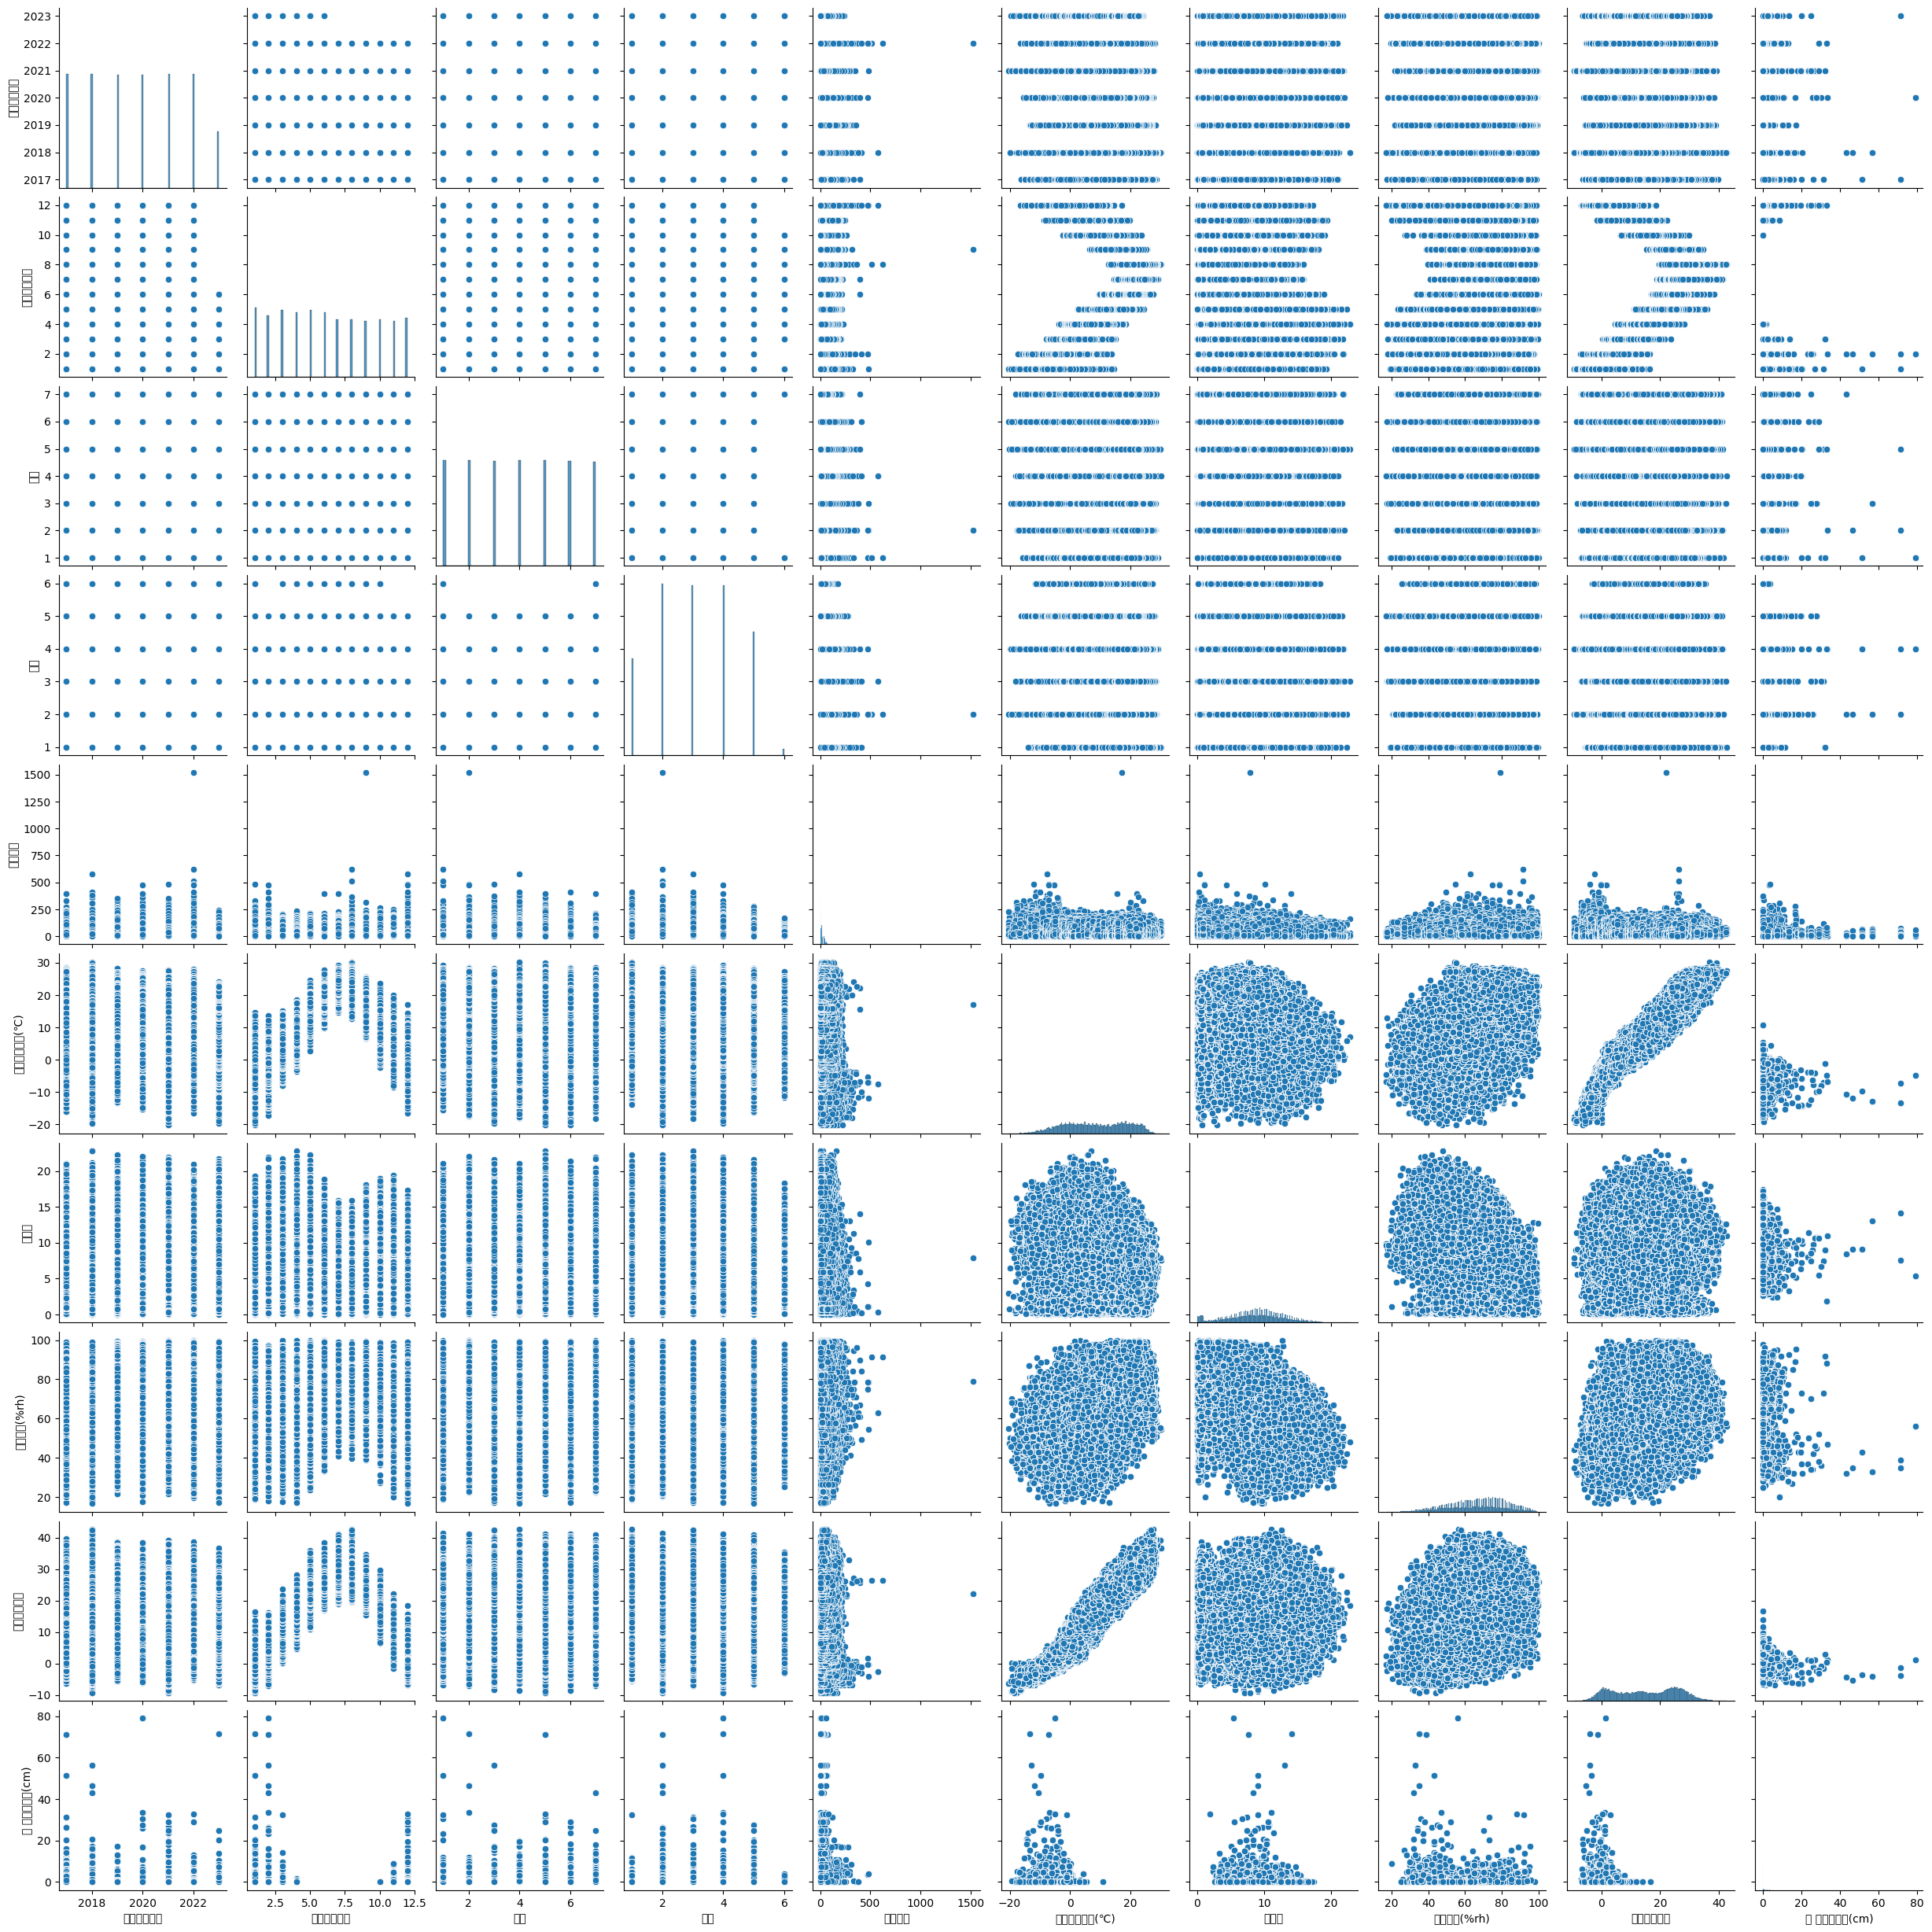

In [82]:
sns.pairplot(data = train)
plt.show()

<ipython-input-92-58cdac387cd8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-92-58cdac387cd8>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missin

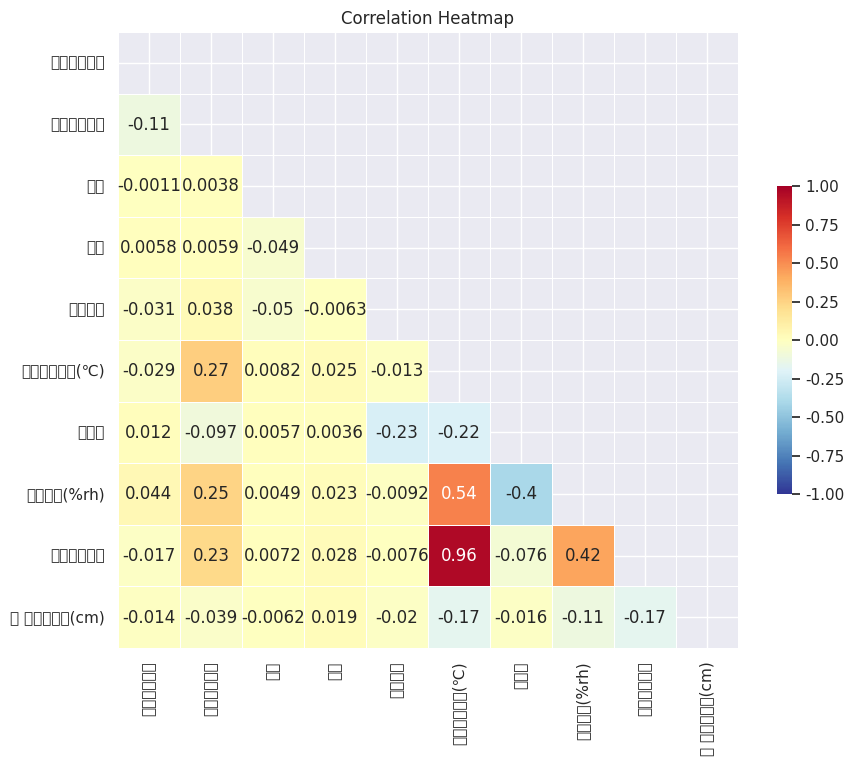

In [92]:
### 상관계수 시각화
# 영화 관객수와 관련 있는 변수 파악

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

-> heatmap을 통해 사고건수가 다른 변수들과 상관관계가 크지 않다는 사실을 발견...

###**1-2 결측치 확인**

In [108]:
### column 함수를 기준으로 결측값을 계산하는 함수

def missing_values_table(df):
        # 데이터 내에서 결측치의 총 개수
        mis_val = df.isnull().sum()

        # 전체 데이터에 대한 결측치의 비율
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # 결과 테이블 만들기
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1) # 컬럼 방향으로 결합

        # 컬럼명 재정의
        mis_val_table_ren_columns = mis_val_table.rename(
            columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # 결측치의 비율을 기준으로 내림차순 정렬
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                '% of Total Values', ascending = False).round(1) # 소수 첫째자리에서 반올림

        # 요약 정보 출력
        print ("선택된 데이터프레임은 " + str(df.shape[1]) + "개의 변수를 가지고 있습니다.\n"
            "이때 결측치(missing value)를 가지는 변수의 개수는 " + str(mis_val_table_ren_columns.shape[0]) +
              "개 입니다.\n")
        return mis_val_table_ren_columns

In [109]:
# 결측치에 대한 요약 정보 확인

missing_values = missing_values_table(train)
missing_values

선택된 데이터프레임은 15개의 변수를 가지고 있습니다.
이때 결측치(missing value)를 가지는 변수의 개수는 5개 입니다.



,Missing Values,% of Total Values
일 최심신적설(cm),495081,93.2
평균지면온도,1654,0.3
일교차,1383,0.3
평균습도(%rh),925,0.2
평균최저기온(℃),923,0.2


###**1-3변수형태 확인**

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531087 entries, 0 to 531086
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   사고발생일자       531087 non-null  datetime64[ns]
 1   사고발생년도       531087 non-null  int64         
 2   사고발생월도       531087 non-null  int64         
 3   지역(시도)       531087 non-null  object        
 4   지역(구군)       531087 non-null  object        
 5   공휴일구분        531087 non-null  object        
 6   주말구분         531087 non-null  object        
 7   요일           531087 non-null  int64         
 8   주차           531087 non-null  int64         
 9   사고건수         531087 non-null  int64         
 10  평균최저기온(℃)    530164 non-null  float64       
 11  일교차          529704 non-null  float64       
 12  평균습도(%rh)    530162 non-null  float64       
 13  평균지면온도       529433 non-null  float64       
 14  일 최심신적설(cm)  36006 non-null   float64       
dtypes: datetime64[ns](1), float64(5), 

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531087 entries, 0 to 531086
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   사고발생일자       531087 non-null  datetime64[ns]
 1   사고발생년도       531087 non-null  int64         
 2   사고발생월도       531087 non-null  int64         
 3   지역(시도)       531087 non-null  object        
 4   지역(구군)       531087 non-null  object        
 5   공휴일구분        531087 non-null  object        
 6   주말구분         531087 non-null  object        
 7   요일           531087 non-null  int64         
 8   주차           531087 non-null  int64         
 9   평균최저기온(℃)    530164 non-null  float64       
 10  일교차          529704 non-null  float64       
 11  평균습도(%rh)    530162 non-null  float64       
 12  평균지면온도       529433 non-null  float64       
 13  일 최심신적설(cm)  36006 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 60.8+ MB


###**1-4범주형 변수 Encoding**

In [112]:
from sklearn.preprocessing import LabelEncoder

cat = ['주말구분']

le = LabelEncoder() # 객체 생성
for i in cat:
  le = le.fit(train[i])
  train[i]=le.transform(train[i])

  for label in np.unique(test[i]):
    if label not in le.classes_:
      le.classes_ = np.append(le.classes_, label)
  test[i] = le.transform(test[i])

In [113]:
### 주말구분, 공휴일구분 변수 인코딩
# 라벨이 없는 경우 LabelEncoder가 정상적으로 작동하지 않음
# 따라서, 일단 라벨이 있는 데이터에 대해서만 인코딩 진행

le2 = LabelEncoder() # 객체 생성

le2 = le2.fit(train.loc[train['주말구분'].notnull(),'주말구분'])
train.loc[train['주말구분'].notnull(),'주말구분'] = le2.transform(train.loc[train['주말구분'].notnull(),'주말구분'])

In [114]:
from sklearn.preprocessing import LabelEncoder

cat = ['공휴일구분']

le = LabelEncoder() # 객체 생성
for i in cat:
  le = le.fit(train[i])
  train[i]=le.transform(train[i])

  for label in np.unique(test[i]):
    if label not in le.classes_:
      le.classes_ = np.append(le.classes_, label)
  test[i] = le.transform(test[i])

In [115]:
e2 = LabelEncoder() # 객체 생성

le2 = le2.fit(train.loc[train['공휴일구분'].notnull(),'공휴일구분'])
train.loc[train['공휴일구분'].notnull(),'공휴일구분'] = le2.transform(train.loc[train['공휴일구분'].notnull(),'공휴일구분'])

###**전처리 파일 저장**


In [ ]:
train.to_excel()

In [ ]:
test.to_excel()